In [2]:
import pandas as pd
import sanity_checks_methods
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from time import time
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import ML_algorithms

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df = df.dropna()
df = df[df['sex'] >= 0]

sanity_checks_methods.drop_negative_age(df)

Inserting 10% null values in feature avg_glucose_level

In [3]:
print('NULL COUNTS BEFORE INSERTING NULL VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

sanity_checks_methods.add_null_values(df,'avg_glucose_level', 10)

print('\n NULL COUNTS AFTER INSERTING NULL VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)


NULL COUNTS BEFORE INSERTING NULL VALUES
-------------------------
9999
Null Value Counts:
sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Percentage of Null Values:
sex                  0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

Duplicate Counts:
0

Percentage of Duplicate Values:
0.0

Feature: sex
Null Count: 0
Null Percentage: 0.00%

Feature: age
Null Count: 0
Null Percentage: 0.00%

Feature: hypertension
Null Count: 0
Null Percentage: 0.00%

Feature: heart_disease
Null Count: 0
Null Percentage: 0.00%

Feature: ever_married
Null Count: 0
Null Pe

Inserting 10% null values in bmi feature

In [4]:
print('NULL COUNTS BEFORE INSERTING NULL VALUES IN BMI FEATURE')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

sanity_checks_methods.add_null_values(df,'bmi', 0.1)

print('\n NULL COUNTS AFTER INSERTING NULL VALUES IN BMI VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

NULL COUNTS BEFORE INSERTING NULL VALUES IN BMI FEATURE
-------------------------
9999
Null Value Counts:
sex                    0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level    999
bmi                    0
smoking_status         0
stroke                 0
dtype: int64

Percentage of Null Values:
sex                  0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    9.990999
bmi                  0.000000
smoking_status       0.000000
stroke               0.000000
dtype: float64

Duplicate Counts:
1

Percentage of Duplicate Values:
0.010001000100010001

Feature: sex
Null Count: 0
Null Percentage: 0.00%

Feature: age
Null Count: 0
Null Percentage: 0.00%

Feature: hypertension
Null Count: 0
Null Percentage: 0.

Inserting 10% null values in ever_worked feature

In [5]:
print('NULL COUNTS BEFORE INSERTING NULL VALUES IN EVER_WORKED FEATURE')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

sanity_checks_methods.add_null_values(df,'ever_worked', 0.01)

print('\n NULL COUNTS AFTER INSERTING NULL VALUES IN EVER_WORKED FEATURE')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

NULL COUNTS BEFORE INSERTING NULL VALUES IN EVER_WORKED FEATURE
-------------------------
9999
Null Value Counts:
sex                    0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level    999
bmi                    9
smoking_status         0
stroke                 0
dtype: int64

Percentage of Null Values:
sex                  0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    9.990999
bmi                  0.090009
smoking_status       0.000000
stroke               0.000000
dtype: float64

Duplicate Counts:
1

Percentage of Duplicate Values:
0.010001000100010001

Feature: sex
Null Count: 0
Null Percentage: 0.00%

Feature: age
Null Count: 0
Null Percentage: 0.00%

Feature: hypertension
Null Count: 0
Null Percen

Decision tree training and prediction followed by tree plot


Prestazioni sul Set di Addestramento:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3451
           1       0.96      0.98      0.97      3548

    accuracy                           0.97      6999
   macro avg       0.97      0.97      0.97      6999
weighted avg       0.97      0.97      0.97      6999


Prestazioni sul Set di Test:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1548
           1       0.91      0.97      0.94      1452

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000


Migliori Parametri: {'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 20, 'criterion': 'gini'}
Tempo impiegato per la Ricerca degli Iperparametri: 12.534435033798218 secondi
Tempo impiegato per l'Addestramento: 0.02027273178100586 secondi
Nod

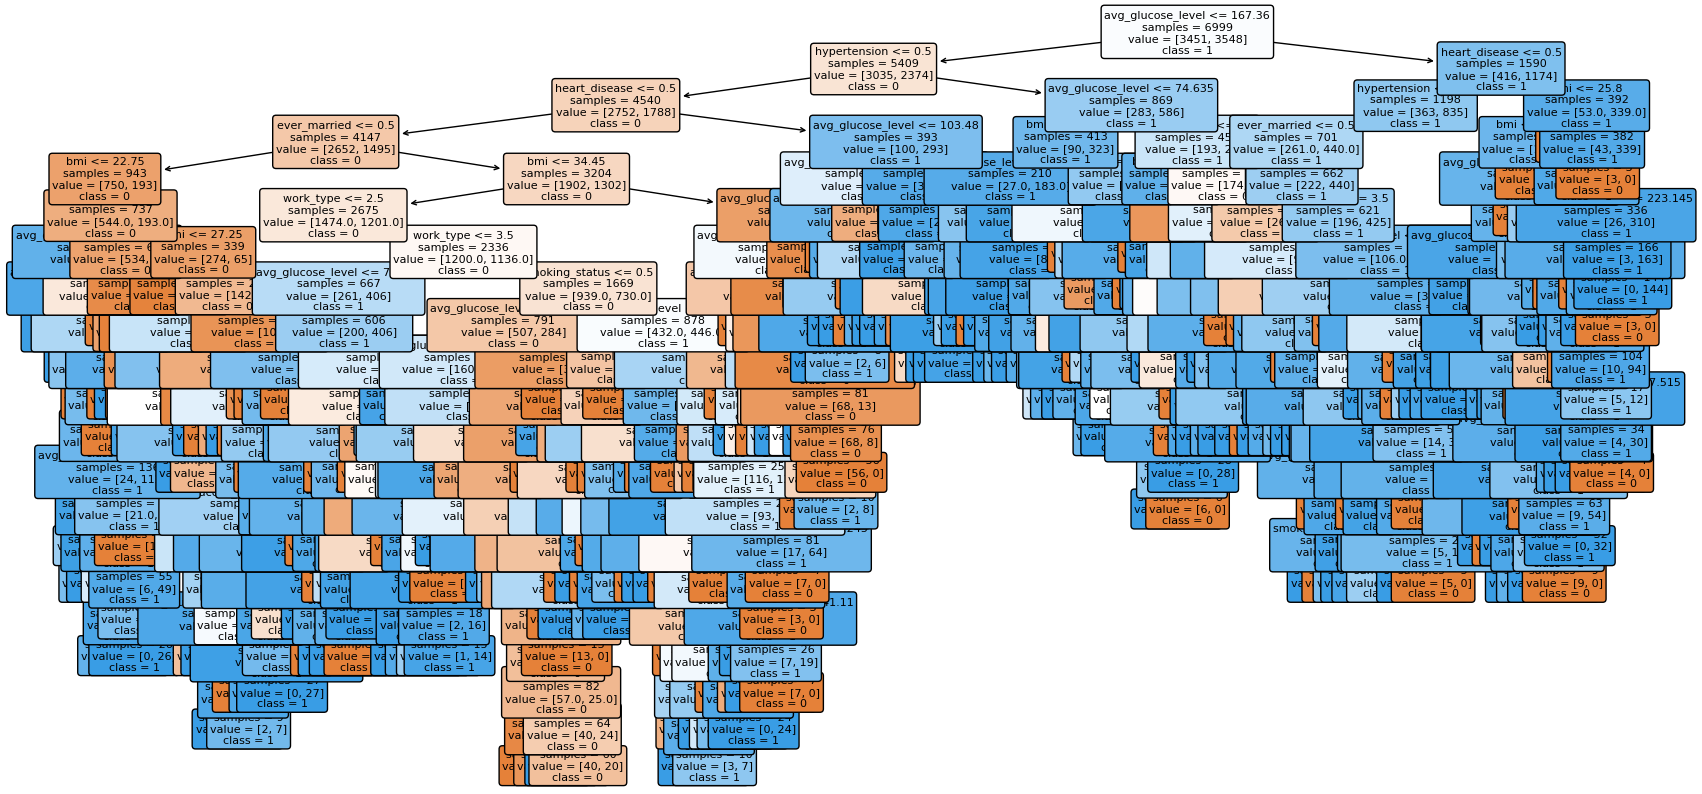

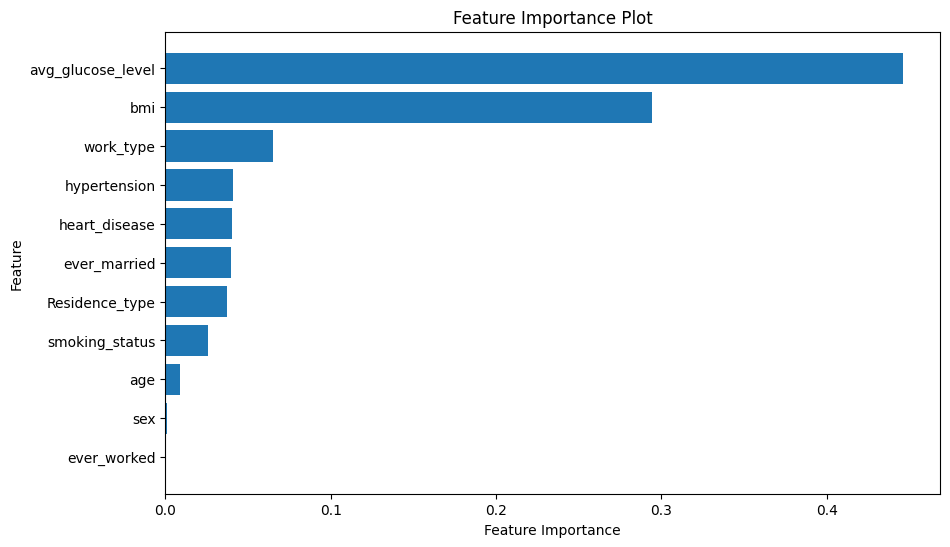

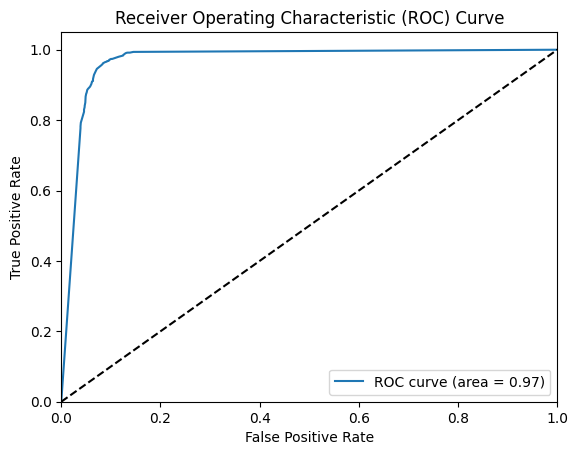

AUC Score: 0.9678441835550714
Accuracy for each fold: [0.9142857142857143, 0.9228571428571428, 0.94, 0.9357142857142857, 0.9157142857142857, 0.9442857142857143, 0.9328571428571428, 0.9428571428571428, 0.93, 0.9313304721030042]
Mean accuracy: 0.9309901900674433


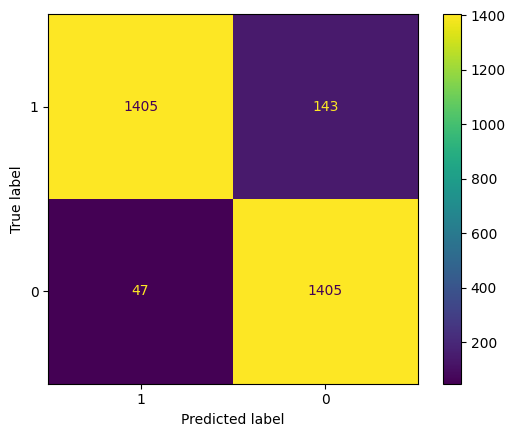

In [6]:
decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

HistGradientBoosting

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 51.9005331993103
Best parameters found:  {'l2_regularization': 0.0, 'learning_rate': 0.1, 'max_depth': 8, 'max_iter': 365, 'min_samples_leaf': 2}
Best score on training data:  0.989852798029361
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3451
           1       1.00      1.00      1.00      3548

    accuracy                           1.00      6999
   macro avg       1.00      1.00      1.00      6999
weighted avg       1.00      1.00      1.00      6999

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1548
           1       0.96      0.99      0.97      1452

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



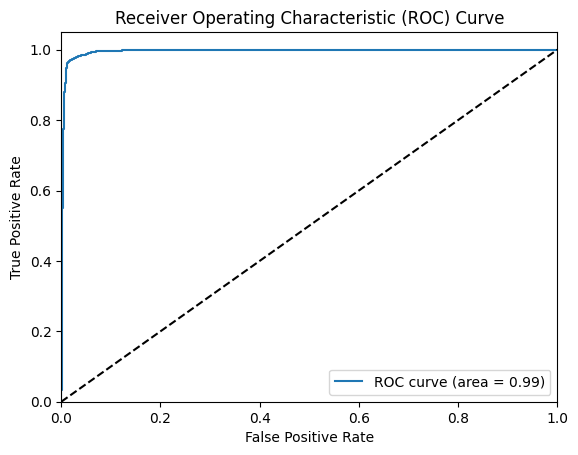

AUC Score: 0.9947590777400502


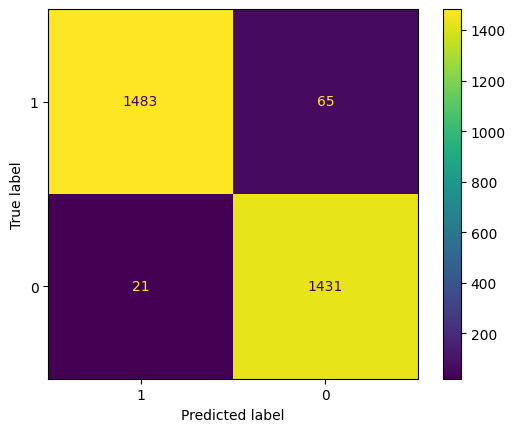

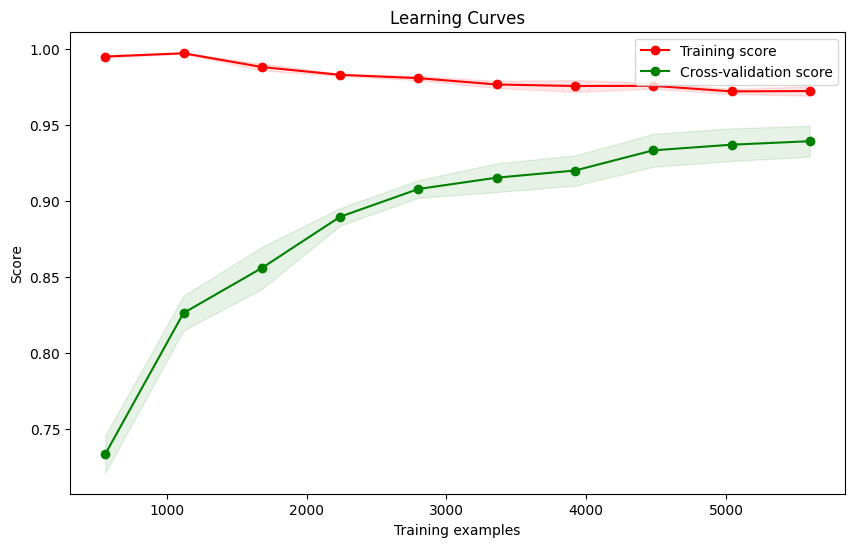

Accuracy for each fold: [0.9757142857142858, 0.9685714285714285, 0.9771428571428571, 0.9771428571428571, 0.9714285714285714, 0.9785714285714285, 0.9742857142857143, 0.98, 0.9614285714285714, 0.9814020028612304]
Mean accuracy: 0.9745687717146945


In [7]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)